# Exercise 04 - Train your first model

## Import libraries

In [285]:
import math

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model, metrics
from sklearn.model_selection import train_test_split

## Read and display data
We assume that the data is located in a subdirectory called "data". To read in the data we use the `read_csv()` method of Pandas.

In [286]:
df = pd.read_csv("../data/advertising.csv")
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


## Select features and labels
We select from the dataframe, column by column, what should be interpreted as features and what should be interpreted as labels.

In [287]:
features = ["TV", "Radio"] # List of Features
X = df[features]
y = df.Sales

## Training-Test Split
Next, we split the data into training and test data. scikit-learn provides the function `train_test_split` in the `sklearn.model` submodule for this purpose. By default, it randomly selects 25% of the data as test data. Setting the `random_state` parameter to a fixed number guarantees that the random generator will select the same 25% of the data each time the function is called (often makes it easier to avoid errors during model development).

In [288]:
test_size = 0.25
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

## Model training
We build a linear regression model. Like all models in scikit-learn, it has a `.fit` method that we use to train the model on the training data.

In [289]:
m = linear_model.LinearRegression()
m.fit(X_train, y_train)

m

LinearRegression()

## Evaluation of the solution
We determine the $R^2$ value and the (root) mean squared error (RMSE) on the training and test data. To do this, we first determine the model prediction `y_pred`. Model predictions in scikit-learn are made using the `.predict` method, which each model has. The parameters $w$ can be accessed using `m.coef_` or `m.intercept`.

In [290]:
# Metrics on the training data
y_pred = m.predict(X_train)
print(f"R^2 Training data: {metrics.r2_score(y_train, y_pred)}.")
print(f"MSE Training data: {metrics.mean_squared_error(y_train, y_pred)}.")

# Metrics on the test data
y_pred = m.predict(X_test)
print(f"R^2 Test data: {metrics.r2_score(y_test, y_pred)}.")
print(f"MSE Test data: {metrics.mean_squared_error(y_test, y_pred)}.")

# Learned coefficients of the model function:
print(f"w0 = {m.intercept_}")
print(f"w = {m.coef_}")

R^2 Training data: 0.8955275873177727.
MSE Training data: 2.8420054812102697.
R^2 Test data: 0.9133183876478477.
MSE Test data: 2.356396290987085.
w0 = 4.8193142960357385
w = [0.05461317 0.10204696]


## Task
1. look at the sample code again.

2. delete the code and run a linear regression for the Advertising dataset using all three features `TV`, `Radio` and `Newspaper`. To do this, perform the following steps in sequence:
    * Read in data.
    * Select features and label.
    * Split data into test and training data.
    * Create and train the model.
    * Evaluate the model. Is the model better than the two-feature model?
    
3. bonus: Visualize the data as scatter plots. You can use e.g. the plot functionality of Pandas for this: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html

In [291]:
df2 = pd.read_csv("../data/advertising.csv")
df2.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [292]:
features_2 =["TV", "Newspaper", "Radio"]
X_2 = df2[features_2]
y_2 = df2.Sales

In [293]:
test_size_2 = 0.19
X_2_train, X_2_test, y_2_train, y_2_test =  train_test_split(X_2, y_2, test_size=test_size_2, random_state =42)

In [294]:
m_2 = linear_model.LinearRegression()

m_2.fit(X_2_train, y_2_train)

LinearRegression()

In [295]:
# Metrics on the training data
y_2_pred = m_2.predict(X_2_train)
RMSE_train = math.sqrt(metrics.mean_squared_error(y_2_train, y_2_pred))
print(f"R^2 Training data: {metrics.r2_score(y_2_train, y_2_pred)}.")
print(f"RMSE Training data: {RMSE_train}.")

# Metrics on the test data
y_2_pred = m_2.predict(X_2_test)
RMSE_test = math.sqrt(metrics.mean_squared_error(y_2_test, y_2_pred))
print(f"R^2 Test data: {metrics.r2_score(y_2_test, y_2_pred)}.")
print(f"RMSE Test data: {RMSE_test}.")

# Learned coefficients of the model function:
print(f"w0 = {m_2.intercept_}")
print(f"w = {m_2.coef_}")

R^2 Training data: 0.9018574253894416.
RMSE Training data: 1.6270682797209806.
R^2 Test data: 0.9012368371732146.
RMSE Test data: 1.7455774266321298.
w0 = 4.713487052206403
w = [0.05448397 0.00460719 0.10071061]


In [296]:
print(f"Linear Model m_1: (features = {features}, test size = {test_size})")
y_pred = m.predict(X_train)
print(f"R^2 Training data: {metrics.r2_score(y_train, y_pred)}.")
y_pred = m.predict(X_test)
print(f"R^2 Test data: {metrics.r2_score(y_test, y_pred)}.")

print()
print(f"Linear Model m_2: (features = {features_2}, test size = {test_size_2})")
y_2_pred = m_2.predict(X_2_train)
print(f"R^2 Training data: {metrics.r2_score(y_2_train, y_2_pred)}.")
y_2_pred = m_2.predict(X_2_test)
print(f"R^2 Test data: {metrics.r2_score(y_2_test, y_2_pred)}.")

Linear Model m_1: (features = ['TV', 'Radio'], test size = 0.25)
R^2 Training data: 0.8955275873177727.
R^2 Test data: 0.9133183876478477.

Linear Model m_2: (features = ['TV', 'Newspaper', 'Radio'], test size = 0.19)
R^2 Training data: 0.9018574253894416.
R^2 Test data: 0.9012368371732146.


*Visuals*

<Axes: xlabel='Newspaper', ylabel='Sales'>

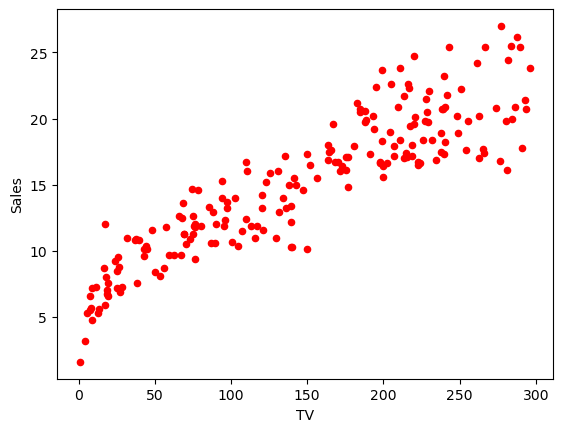

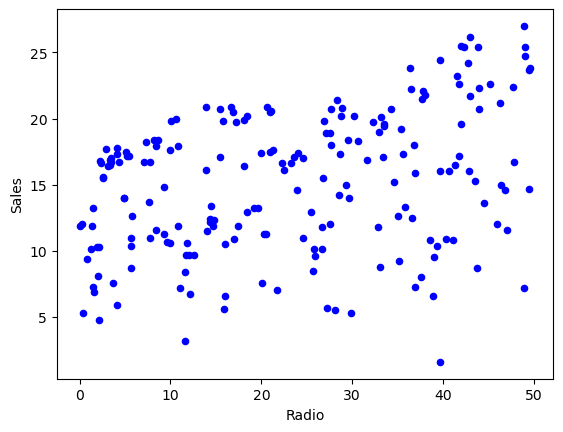

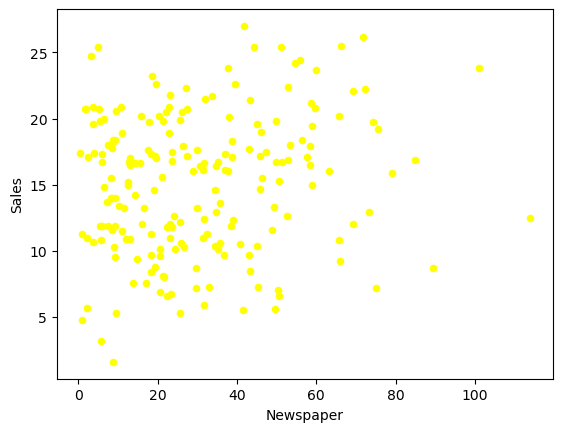

In [297]:
df2.plot.scatter(x="TV", y="Sales", color="red")
df2.plot.scatter(x="Radio", y="Sales", color="blue")
df2.plot.scatter(x="Newspaper", y="Sales", color="yellow")


Text(0, 0.5, 'Sales in n')

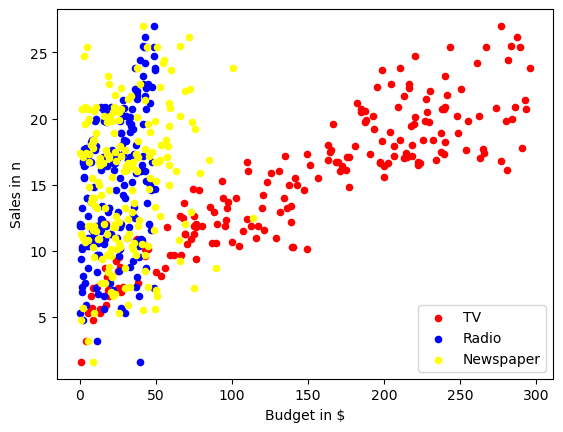

In [302]:
ax1 = df2.plot(kind='scatter', x='TV', y='Sales', color='red',  label="TV")    
ax2 = df2.plot(kind='scatter', x='Radio', y='Sales', color='blue', ax=ax1, label="Radio")    
ax3 = df2.plot(kind='scatter', x='Newspaper', y='Sales', color='yellow', ax=ax1, label ="Newspaper")

ax1.set_xlabel("Budget in $")
ax1.set_ylabel("Sales in n")